In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotting import set_matplotlib_style

In [2]:
def optimal_rate(kappa, epsilon):
    sqrt_eps = np.sqrt(epsilon)
    kappa_minus_1 = kappa - 1
    numerator = (
        (sqrt_eps - 1)
        * kappa_minus_1
        * (
            -1
            - sqrt_eps * kappa_minus_1
            + kappa
            + np.sqrt(
                (kappa_minus_1) ** 2
                + epsilon * (kappa_minus_1) ** 2
                + 2 * sqrt_eps * (1 + kappa * (6 + kappa))
            )
        )
    )
    denominator = 2 * (1 + kappa) ** 2
    return sqrt_eps - numerator / denominator

def richtarik_rate(kappa, epsilon):
    mu = 1 / kappa  # Assuming L = 1
    L = 1
    theta = 1 - np.sqrt(epsilon)
    beta =  epsilon / (1 - np.sqrt(epsilon))
    gamma1 = theta / (2*mu)
    gamma2 = 1 / (L*(1 + np.sqrt(2*beta / theta)))
    gamma = min(gamma1, gamma2)
    return 1 - gamma / kappa 

/var/folders/jp/4x1js6b941nfbcyc4wzq517r6rlm67/T/ipykernel_3182/838661212.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  beta =  epsilon / (1 - np.sqrt(epsilon))


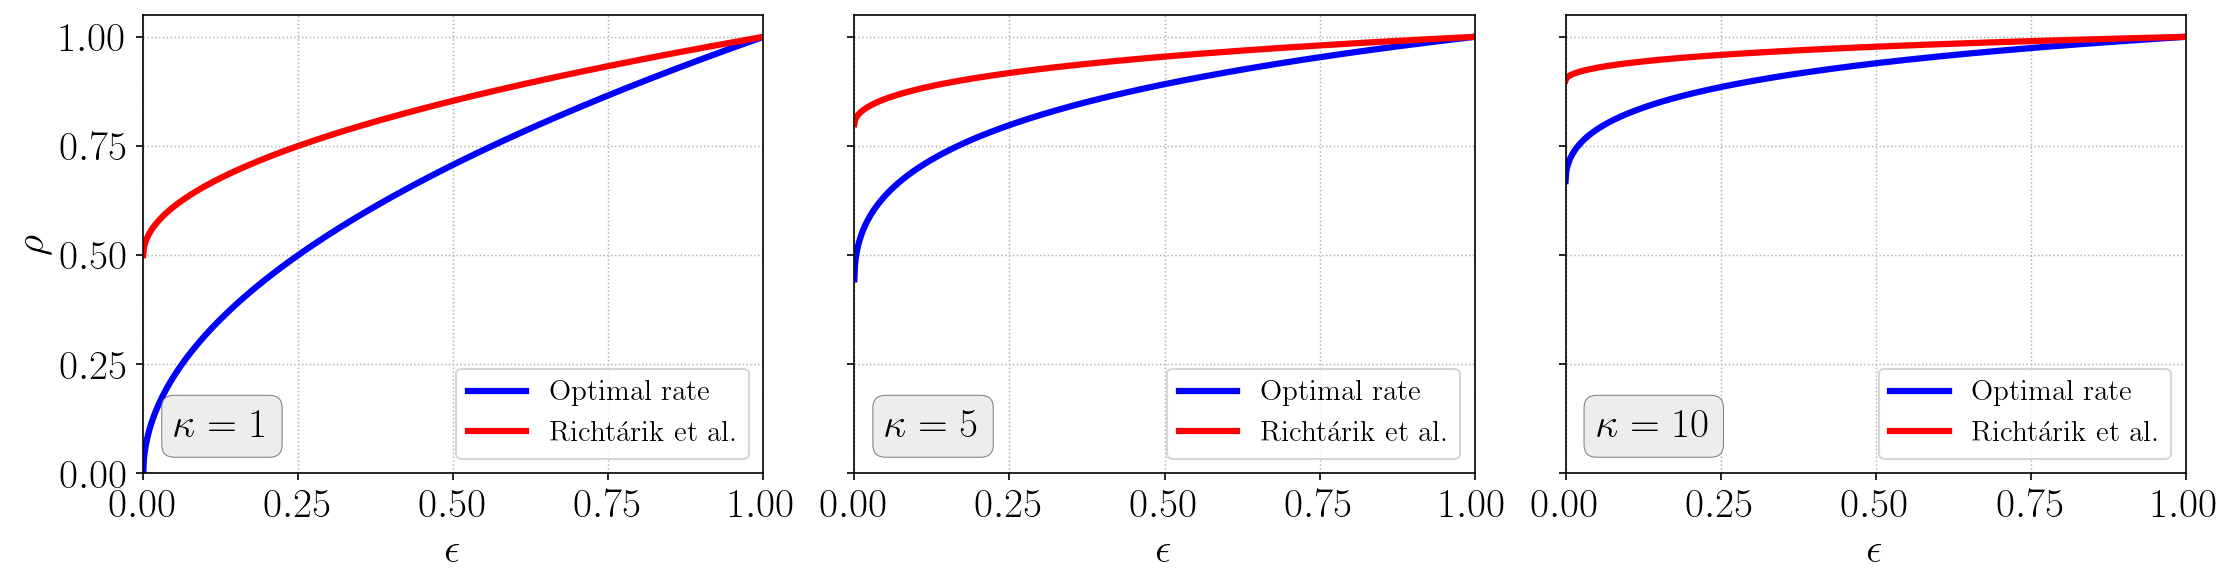

In [ ]:
from plotting import standard_textbox

set_matplotlib_style()

# Constants matching experiments.py
LABEL_SIZE = 20
TICK_SIZE = 20

fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=150, sharey=True)
kappas = [2, 5, 10]
epsilons = np.linspace(0, 1, 1000)

for idx, kappa in enumerate(kappas):
    opt_rates = np.array([optimal_rate(kappa, eps) for eps in epsilons])
    richtarik_rates = np.array([richtarik_rate(kappa, eps) for eps in epsilons])
    ax = axes[idx]
    ax.plot(epsilons, opt_rates, label="Optimal rate", color="blue", linewidth=3)
    ax.plot(epsilons, richtarik_rates, label="Richtárik et al.", color="red", linewidth=3)
    ax.set_xlabel("$\\epsilon$", fontsize=LABEL_SIZE)
    if idx == 0:
        ax.set_ylabel("$\\rho$", fontsize=LABEL_SIZE)
    ax.grid(True, which='both', linestyle=':', linewidth=0.7)
    ax.set_xlim(0, 1)
    ax.set_ylim(bottom=0)
    ax.tick_params(labelsize=TICK_SIZE)
    
    # Add textbox with kappa value (moved to the left edge)
    txtbox_kwargs = standard_textbox(f'$\\kappa = {kappa}$', {'x': 0.05, 'y': 0.15})
    ax.text(**txtbox_kwargs)
    
    # Add legend to all subplots in lower right corner
    ax.legend(fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig('figures/rate_comparison.pdf', dpi=150, bbox_inches='tight')
plt.show()